# 第一周测试
* 主要测试Opencv书本的前6章节的学习情况。


* 测试要求
    * 1.填充完成下面的代码，运行结束后和相应的答案图片比较
    * 2.完成所有内容后，保存文件，上传到自己的github帐号里面
    * 3.请尽量在本周内完成，下周一为最后期限。

# 载入图片的实例
* 与书本内容有所不同，因为要在jupyter notebook里面显示，所以采用matplotlib来载入图片

In [1]:
# 载入图片并显示
# Load package
import cv2
import matplotlib.pyplot as plt
import numpy as np

# load image
image = cv2.imread("winnie.jpeg")

(b, g, r) = image[0, 0]
print("Pixel at (0, 0) - Red: {}, Green: {}, Blue: {}".format(r,g, b))
image[0, 0] = (0, 0, 255)
(b, g, r) = image[0, 0]
print("Pixel at (0, 0) - Red: {}, Green: {}, Blue: {}".format(r,g, b))

#--------code for showing image------------

# transfer BGR to RGB 
# (Because plt show image in RGB, but opencv load image in BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# set image to show
plt.imshow(image)
# set title
plt.title("Winnie the Pooh")
# show image
plt.show()

Pixel at (0, 0) - Red: 218, Green: 236, Blue: 88
Pixel at (0, 0) - Red: 255, Green: 0, Blue: 0


<Figure size 640x480 with 1 Axes>

In [2]:
# 为了以后方便显示，把显示方法放入show_image方法中
def show_image(title,image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # set image to show
    plt.imshow(image)
    # set title
    plt.title(title)
    # show image
    plt.show()


# 题目一

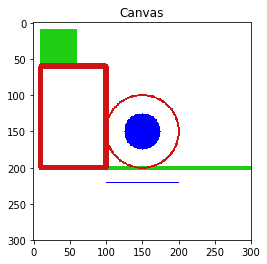

True

In [3]:
# 创建白色画布
canvas = np.full((300,300,3),255,dtype="uint8")

green = (20,205,30)
black = (0,0,0)
red = (20,20,205)
blue = (255,0,0)
cv2.line(canvas,(300,200),(100,200),green,3)
cv2.line(canvas,(100,220),(200,220),blue)
cv2.rectangle(canvas,(10,10),(60,60),green,-1)
cv2.rectangle(canvas,(10,60),(100,200),red,5)

pos = (canvas.shape[1] //2, canvas.shape[0] //2)
white = (255,255,255)
r = 50

cv2.circle(canvas,pos,r,red,2)

cv2.circle(canvas,pos,r//2,blue,-1)
show_image("Canvas",canvas)
cv2.imwrite("Test_1.jpg",canvas)

# 题目二

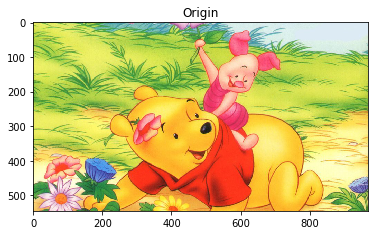

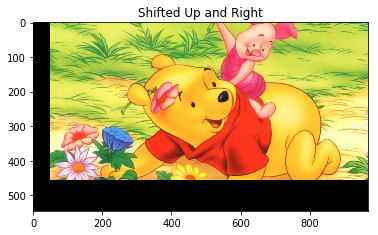

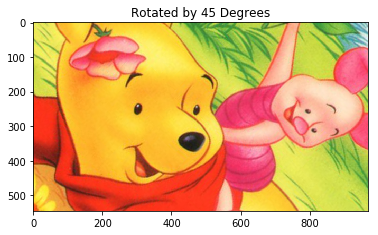

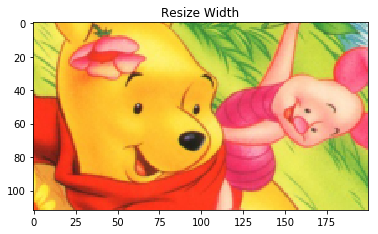

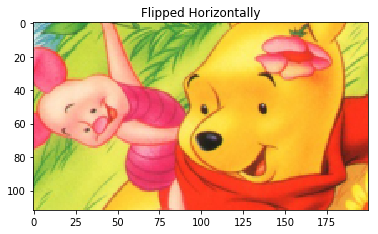

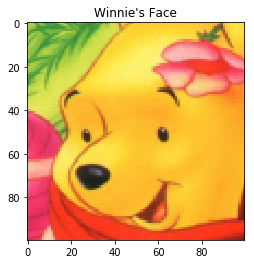

True

In [4]:
image = cv2.imread("./winnie.jpeg")
show_image("Origin",image)
# 向右50 pixel，向上90 pixel
M = np.float32([[1,0,50,],[0,1,-90]])
shifted = cv2.warpAffine(image,M,(image.shape[1],image.shape[0]))
show_image("Shifted Up and Right",shifted)

# 绕中心顺时针旋转45度
(h,w) = image.shape[:2]
center = (w // 2, h //2)

M = cv2.getRotationMatrix2D(center,-45,2.0)
rotated = cv2.warpAffine(image,M,(w,h))
show_image("Rotated by 45 Degrees",rotated)

# 宽度等比例缩小到200 pixel
r = 200.0 / rotated.shape[1]
dim = (200, int(rotated.shape[0]*r))
resized = cv2.resize(rotated,dim,interpolation = cv2.INTER_AREA)
show_image("Resize Width",resized)
# 水平对称图片
flipped = cv2.flip(resized ,1)
show_image("Flipped Horizontally",flipped)
# 把小熊维尼的头像剪切出来
cropped = flipped[0:100,75:175]
show_image("Winnie's Face",cropped)
cv2.imwrite("Test_2_Winnies's_Face.jpg",cropped)

# 题目三

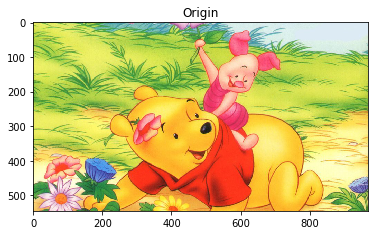

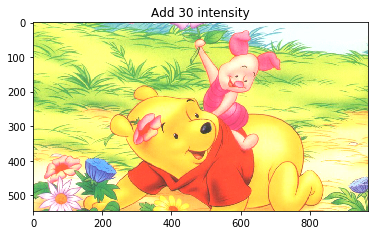

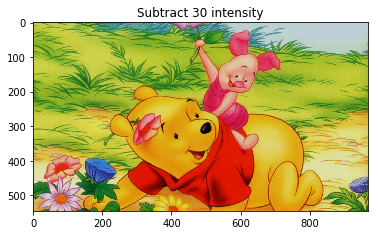

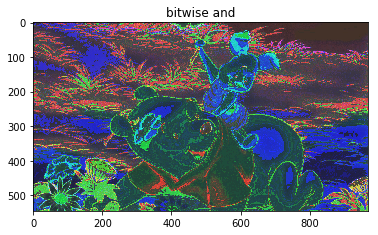

In [5]:
show_image("Origin",image)

M = np.full(image.shape,30,dtype="uint8")
addImage = cv2.add(image,M)
show_image("Add 30 intensity",addImage)

subImage = cv2.subtract(image,M)
show_image("Subtract 30 intensity",subImage)

bitwiseXor = cv2.bitwise_xor(addImage,subImage)
show_image("bitwise and",bitwiseXor)

# 题目四

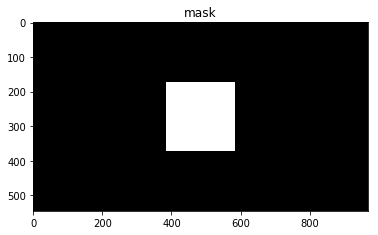

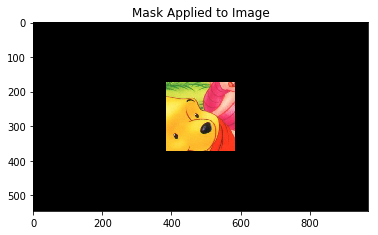

In [6]:
mask = np.zeros(image.shape[:2],dtype = "uint8")
(cX,cY) = (image.shape[1]//2,image.shape[0]//2)
cv2.rectangle(mask,(cX-100,cY-100),(cX+100,cY+100),255,-1)
plt.title("mask")
plt.imshow(mask,cmap = plt.cm.gray)
plt.show()

masked = cv2.bitwise_and(image,image,mask=mask)
show_image("Mask Applied to Image",masked)

# 题目五

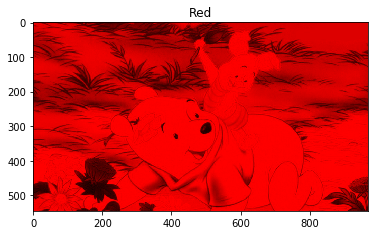

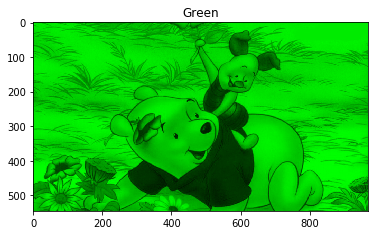

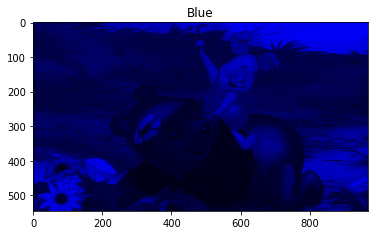

In [7]:
(B,G,R) = cv2.split(image)
zeros = np.zeros(image.shape[:2],dtype = "uint8")
show_image("Red",cv2.merge([zeros,zeros,R]))
show_image("Green",cv2.merge([zeros,G,zeros]))
show_image("Blue",cv2.merge([B,zeros,zeros]))

# 题目六

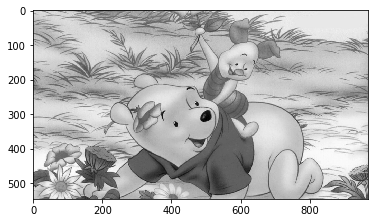

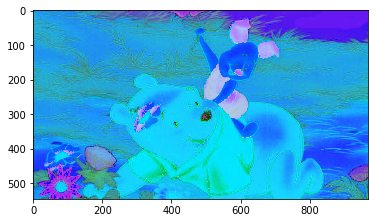

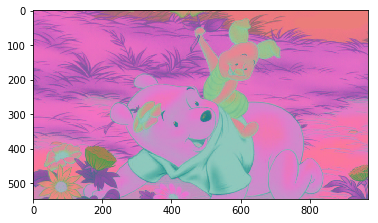

In [8]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
lab = cv2.cvtColor(image,cv2.COLOR_BGR2LAB)

plt.imshow(gray,cmap = plt.cm.gray)
plt.show()
plt.imshow(hsv)
plt.show()
plt.imshow(lab)
plt.show()